# Assumptions of the Linear Regression Algorithm

In order to build a Machine learning model using the Linear Regression Algorithm, the following assumptions should be satisfied.

1. Linear Relationship should exists between independent and dependent variables
2. No Multicollinearity
3. Normality of Residuals
4. Homoscedasticity
5. No Autocorrelation of the errors

### 1.Linear Relationship between input and output
- Each of the independent features should have a sort of linear relationship(either positive or negative) with the dependent variable as shown in the figures 1 and 2 below.
- How to check this ? 
  - We can try plotting a scatter plot of each independent variable against the dependent variables. 

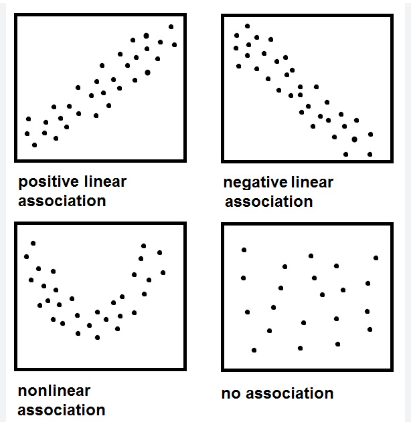

### 2. Multicollinearity
- The independent features should not be correlated with each other (i.e.) there should be no relationship between the independent variables. If there exist some relationship between the independent variables then they are considered to collinear.
- Example, consider there are two scientist are working on a project. Once the project completed we need to evaluate their contribution. If they were from different discipline of study say Chemistry & Biology then we could clearly discriminate their efforts but if we have a scenario where both are from same discipline of study(say Chemistry) then evaluating their effort might become tough. 
- How to detect multicollinearity?
    - Using the correlation matrix/VIF

### 3. Normality of the Residuals
- Residual/error with respect to the regression is the difference between the actual value vs the predicted value.
- In the figure 1 below the green datapoints represent the actual value. Now, when we draw a best fit line(red line) to perform the prediction, the distance between the actual datapoints & the best fit line is considered to be error/residual.
- Now, if we plot(distplot,qqplot,probplot) these residuals, they should follow a normal distribution as shown in Fig2 below. 

#### Residual Depiction
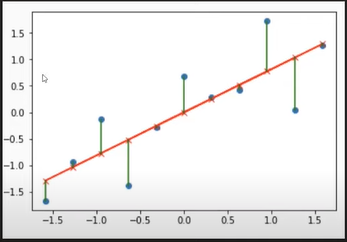

#### Residuals plot
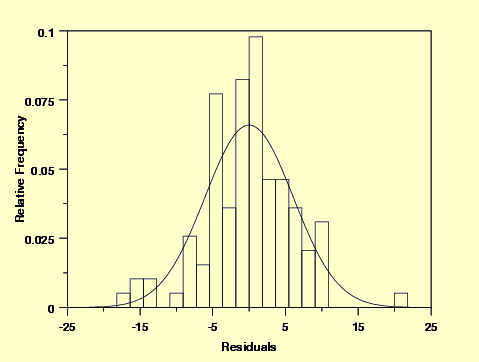

### 4. Homoscedasticity
- Homo means 'same', scedasticity means 'spread'. This assumption is already to residuals. 
- When we scatterplot the Y_predicted variable (i.e.) predicted output against the residuals/error. The spread should be even througout the x-axis. 

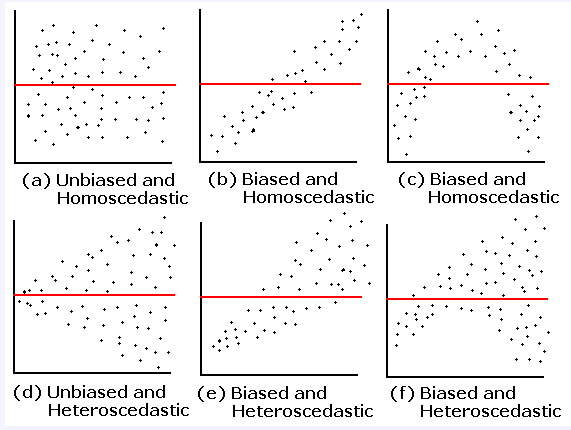

### 5.No Autocorrelation of Errors
- No correlation should exist within the errors/rediduals.

### Practical Implementation of Linear Regression & Checking the assumptions.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import scipy as sp

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
##Dropping the address feature 
df.drop('Address',axis=1,inplace=True)

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [7]:
#Splitting the dataset into X-independent features, Y-dependent featues
X = df.drop('Price',axis=1)
Y = df['Price']

In [8]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [9]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [14]:
#Splitting the dataset into train and test data. 
print('Shape of X before split :',X.shape)
print('Shape of X before split :',Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=2496)
print('Shape of X_train after split :',X_train.shape)
print('Shape of X_test after split :',X_test.shape)
print('Shape of Y_train after split :',Y_train.shape)
print('Shape of Y_test after split :',Y_test.shape)

Shape of X before split : (5000, 5)
Shape of X before split : (5000,)
Shape of X_train after split : (3750, 5)
Shape of X_test after split : (1250, 5)
Shape of Y_train after split : (3750,)
Shape of Y_test after split : (1250,)


In [15]:
#Model Initiation
model = LinearRegression()
model.fit(X_train,Y_train) #Fitting the model

LinearRegression()

In [30]:
#Residual Prediction 
Y_pred = model.predict(X_test)
residual = Y_test - Y_pred

### Checking for the Assumptions on the data

### 1.Linear Relationship

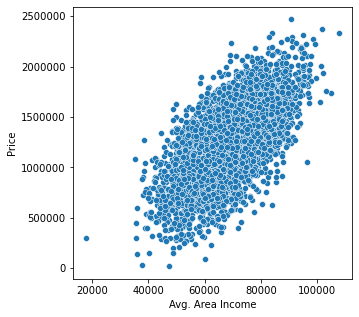

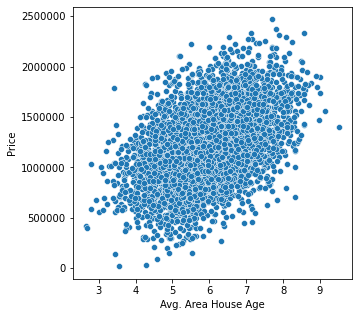

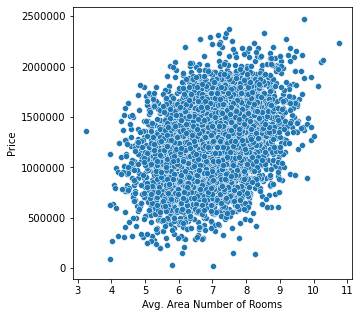

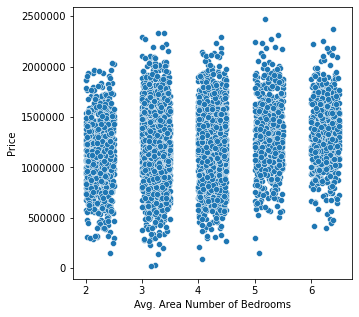

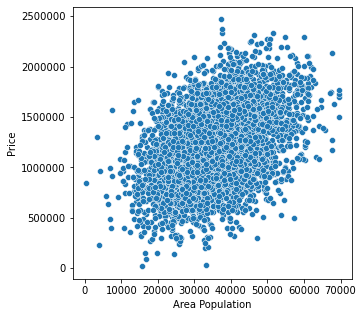

In [26]:
for feature in X.columns:
    plt.figure(figsize=(5,5))
    plt.ticklabel_format(style='plain')
    sns.scatterplot(x=X[feature],y=Y)

### 2.No Multicollinearity

<AxesSubplot:>

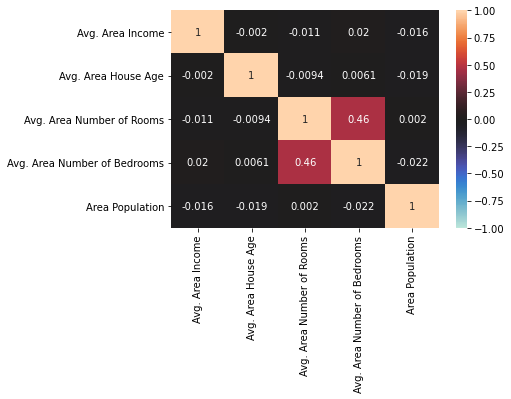

In [27]:
## Checking the correlation of all the independent variables
corr=X.corr()
sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

In [28]:
## Checking via the vif
vif = []

for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X, i))

In [29]:
pd.DataFrame({'vif':vif},index=df.columns[0:5])#The vif seems to be much higher. 

,vif
Avg. Area Income,29.650899
Avg. Area House Age,27.447775
Avg. Area Number of Rooms,45.257291
Avg. Area Number of Bedrooms,14.537873
Area Population,12.825450


### 3.Normality of the Residuals

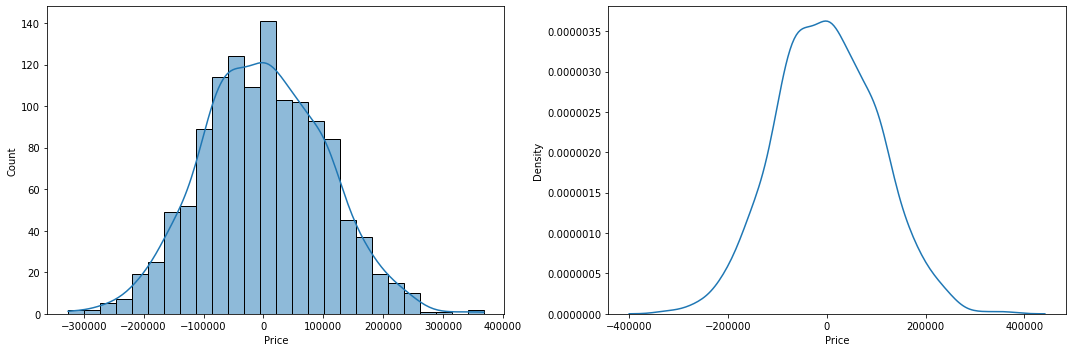

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data=residual,kde=True)
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain')
sns.kdeplot(data=residual)
# plt.subplot(1,3,3)
# sp.stats.probplot(residual, fit=True)
plt.tight_layout()
plt.show()

### 4. Homoscedasticity

<AxesSubplot:ylabel='Price'>

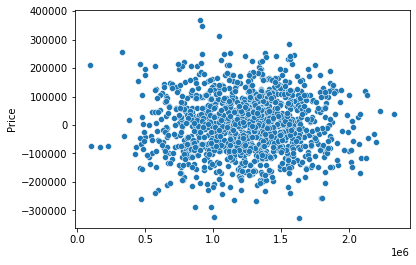

In [55]:
sns.scatterplot(x=Y_pred,y=residual)

### 5.No Autocorrelation of erros

<AxesSubplot:ylabel='Price'>

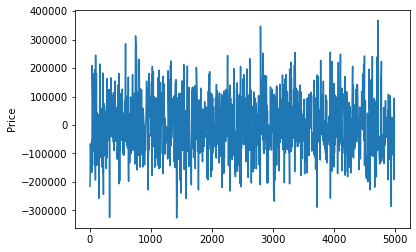

In [57]:
sns.lineplot(data=residual) #No Autocorrelation exists.